# Model Checks, Model Selection, Multivariate Distributions

## Posterior predictive checks

Bayesian models are **generative**: once we have a posterior $p(\theta \mid y)$, we can simulate new data sets
from the model.

For observed data $y$ and future (or replicated) data $y_{\text{rep}}$, the **posterior predictive distribution** is

$$
p(y_{\text{rep}} \mid y)
= \int p(y_{\text{rep}} \mid \theta)\, p(\theta \mid y)\, d\theta.
$$

A **posterior predictive check** compares:

- the observed data $y$, and
- many replicated datasets $y_{\text{rep}}^{(1)},\dots,y_{\text{rep}}^{(S)}$ drawn from $p(y_{\text{rep}} \mid y)$.

If the simulated data are, on average, very different from the observed data (for example, in mean, variance, tails,
shape…), then the **likelihood model** $p(y \mid \theta)$ is likely misspecified.

Important points from the slides:

- **Priors** “fade away” as we collect more data; the likelihood stays.
- If the likelihood is structurally wrong, it will stay wrong no matter how much data we collect.
- The goal is not to find a perfect model (none exists), but a model whose predictions are **compatible** with the data.

## Poisson likelihood and its limitations for count data

For count data $Y \in \{0,1,2,\dots\}$, a common starting point is the **Poisson distribution**:

$$
P(Y = k \mid \lambda)
= \frac{\lambda^{k} e^{-\lambda}}{k!},
\quad k = 0,1,2,\dots,\; \lambda > 0.
$$

Moments:

- Mean:
  $$
  \mathbb{E}[Y \mid \lambda] = \lambda
  $$
- Variance:
  $$
  \operatorname{Var}(Y \mid \lambda) = \lambda
  $$

The key limitation:

- The Poisson **forces** mean and variance to be equal.
- Many real count data sets show **overdispersion**:
  $$
  \operatorname{Var}(Y) > \mathbb{E}[Y].
  $$

Posterior predictive checks can reveal this: simulated data from the Poisson model may have **too low variance**
compared to the observed data.

## The negative binomial distribution

The **negative binomial distribution** is a flexible alternative to the Poisson for count data with overdispersion.

Classical interpretation:

- Consider repeated **Bernoulli trials** with success probability $p$.
- Let $K$ be the number of **failures** observed before the $r$-th success.

Then $K$ follows a **negative binomial distribution** with parameters $(r,p)$:

$$
P(K = k \mid r, p)
= \binom{k + r - 1}{k}\, (1-p)^k\, p^r,
\quad k = 0,1,2,\dots,\; r > 0,\; 0 < p < 1.
$$

Moments in this parameterization:

- Mean:
  $$
  \mathbb{E}[K \mid r,p] = r\, \frac{1-p}{p}
  $$
- Variance:
  $$
  \operatorname{Var}(K \mid r,p) = r\, \frac{1-p}{p^2}.
  $$

We can reparameterize in terms of a **mean $\lambda$** and **overdispersion parameter $r$**.

Set

$$
\lambda = r\, \frac{1-p}{p},
\quad \text{so that}\quad
p = \frac{r}{r + \lambda}.
$$

Substituting into the pmf yields an equivalent negative binomial distribution with parameters $(r, \lambda)$,

$$
P(K = k \mid r, \lambda)
= \binom{k + r - 1}{k}
  \left( \frac{\lambda}{\lambda + r} \right)^k
  \left( \frac{r}{\lambda + r} \right)^r.
$$

In this form,

- Mean:
  $$
  \mathbb{E}[K \mid r,\lambda] = \lambda
  $$
- Variance:
  $$
  \operatorname{Var}(K \mid r,\lambda)
  = \lambda + \frac{\lambda^2}{r}.
  $$

Thus, for finite $r$, we have **overdispersion**:

$$
\operatorname{Var}(K \mid r,\lambda) > \mathbb{E}[K \mid r,\lambda].
$$

In the **limit $r \to \infty$**, the variance approaches the mean and the negative binomial distribution converges
to a **Poisson distribution** with rate $\lambda$.

This makes the negative binomial a natural generalization of the Poisson that allows the variance to be
separately controlled via $r$.

## Posterior predictive checks: Poisson vs negative binomial

In the maternity-ward example (beds occupied per night):

- A Poisson model might **underestimate** the variance of bed counts.
- A negative binomial model allows the variance to exceed the mean and can better match the data.

Posterior predictive checks reveal that:

- The Poisson model's replicated data tend to have **too little dispersion**.
- The negative binomial model's replicated data better match both the **mean** and the **spread** of observed counts.

However:

- Adding an extra parameter (the dispersion $r$ or $\alpha$) increases **epistemic uncertainty**.
- There is a trade-off: more flexible models fit data better but are harder to estimate with limited data.

## Model selection: general ideas

Model selection asks: **which model family** explains the data best?

Typical desiderata:

- Good **fit** to the observed data.
- Good **predictive performance** on unseen data.
- Avoiding unnecessary **complexity** (overfitting).
- Reasonable **interpretability**.

In a Bayesian framework, model selection can be approached in several ways:

1. **Posterior model probabilities** via marginal likelihoods and Bayes factors.
2. **Expected log-predictive density (ELPD)**, typically via cross-validation.
3. **Predictive-error metrics** (RMSE, MAE) generalized to the Bayesian setting.

All three approaches are complementary and emphasize **different aspects** of model quality.

## Approach 1: Bayesian model comparison via marginal likelihood

Treat each model $M_i$ as a **hypothesis**. For each model:

- Parameters: $\theta_i$,
- Prior: $p(\theta_i \mid M_i)$,
- Likelihood: $p(y \mid \theta_i, M_i)$.

The **marginal likelihood** (or model evidence) is

$$
p(y \mid M_i)
= \int p(y \mid \theta_i, M_i)\, p(\theta_i \mid M_i)\, d\theta_i.
$$

Given prior model probabilities $P(M_i)$, the **posterior model probability** is

$$
P(M_i \mid y)
= \frac{p(y \mid M_i)\, P(M_i)}
       {\sum_j p(y \mid M_j)\, P(M_j)}.
$$

For two models $M_0$ and $M_1$:

- **Prior odds**:
  $$
  \frac{P(M_1)}{P(M_0)};
  $$
- **Posterior odds**:
  $$
  \frac{P(M_1 \mid y)}{P(M_0 \mid y)}
  = \operatorname{BF}_{10}\,
    \frac{P(M_1)}{P(M_0)},
  $$
- **Bayes factor**:
  $$
  \operatorname{BF}_{10}
  = \frac{p(y \mid M_1)}{p(y \mid M_0)}.
  $$

Bayes factors quantify how much the data shift our odds between models.

## Marginal likelihood: trade-off between accuracy and complexity

The log marginal likelihood admits a useful decomposition that highlights a trade-off between **accuracy** and
**complexity**.

For a model $M$ with parameters $\theta$, prior $p(\theta \mid M)$, likelihood $p(y \mid \theta,M)$, and posterior
$p(\theta \mid y,M)$, we have

$$
\log p(y \mid M)
= \mathbb{E}_{\theta \mid y,M}\big[\log p(y \mid \theta,M)\big]
  - \operatorname{KL}\!\big( p(\theta \mid y,M)\; \|\; p(\theta \mid M) \big),
$$

where

- $\mathbb{E}_{\theta \mid y,M}[\cdot]$ is expectation w.r.t. the **posterior** $p(\theta \mid y,M)$,
- $\operatorname{KL}(p\|q)$ is the **Kullback–Leibler divergence**,
  $$
  \operatorname{KL}(p\|q)
  = \int p(\theta)\, \log \frac{p(\theta)}{q(\theta)}\, d\theta.
  $$

Interpretation:

- **Accuracy term**
  $$
  \mathbb{E}_{\theta \mid y,M}\big[\log p(y \mid \theta,M)\big]
  $$
  measures how well the model fits the data *on average under the posterior*.

- **Complexity term**
  $$
  \operatorname{KL}\!\big( p(\theta \mid y,M)\; \|\; p(\theta \mid M) \big)
  $$
  measures the **information gain** from prior to posterior (always non-negative).

Models with very weak priors and many parameters tend to have:

- high potential accuracy,
- but also high complexity (large information gain),
- which can **reduce** the marginal likelihood.

Hence, the marginal likelihood automatically implements an **Occam’s razor**: it balances fit against complexity.

## Approach 2: Expected log-predictive density (ELPD)

An alternative view focuses on **predictive performance**: how well does a model predict new, unseen data?

Let $y_{\text{new}}$ be a future observation. The **posterior predictive density** is

$$
p(y_{\text{new}} \mid y, M)
= \int p(y_{\text{new}} \mid \theta, M)\, p(\theta \mid y, M)\, d\theta.
$$

The **expected log-predictive density (ELPD)** of a model $M$ is

$$
\operatorname{ELPD}(M)
= \mathbb{E}_{y_{\text{new}}}\big[ \log p(y_{\text{new}} \mid y, M) \big],
$$

where the expectation is taken over hypothetical new data $y_{\text{new}}$ from the (unknown) data-generating process.

- Large ELPD (close to $0$) indicates good predictive performance.
- Very negative ELPD indicates poor predictions (assigning low probability to typical future data).

In practice, since the true distribution of $y_{\text{new}}$ is unknown, we approximate ELPD using **cross-validation**,
most commonly **Leave-One-Out (LOO)**:

- For each observed data point $y_i$, we pretend it is “new” and compute its predictive density given all other data
  $y_{-i}$:
  $$
  p(y_i \mid y_{-i}, M).
  $$
- The **LOO ELPD** is approximated as
  $$
  \widehat{\operatorname{ELPD}}_{\text{LOO}}(M)
  = \sum_{i=1}^{n} \log p(y_i \mid y_{-i}, M).
  $$

Computing this naïvely would require running an MCMC fit **$n$ times**, once for each $y_{-i}$. Modern practice uses
approximations like **PSIS-LOO** (Pareto-smoothed importance sampling) or **WAIC**, both available in PyMC / ArviZ.

## Approach 3: Bayesian RMSE and MAE

Classical (frequentist) predictive metrics for a model with **point predictions** $\hat{y}_i$ are:

- **Root mean squared error (RMSE)**:
  $$
  \operatorname{RMSE}
  = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }.
  $$
- **Mean absolute error (MAE)**:
  $$
  \operatorname{MAE}
  = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |.
  $$

In a **Bayesian** model, there is not a single point prediction per data point, but a **predictive distribution**.
Using posterior predictive simulation, we can generate:

- for each observed $y_i$ and MCMC draw $s=1,\dots,S$, a predictive draw $y_i^{(s)}$.

We can generalize RMSE and MAE by averaging over both **data points** and **posterior samples**:

- **Bayesian RMSE**:
  $$
  \operatorname{RMSE}_{\text{Bayes}}
  = \sqrt{
      \frac{1}{S\,n}
      \sum_{s=1}^{S}
      \sum_{i=1}^{n}
        \big(y_i - y_i^{(s)}\big)^2
    }.
  $$

- **Bayesian MAE**:
  $$
  \operatorname{MAE}_{\text{Bayes}}
  = \frac{1}{S\,n}
    \sum_{s=1}^{S}
    \sum_{i=1}^{n}
      \big|y_i - y_i^{(s)}\big|.
  $$

These metrics evaluate how close, on average, the predictive distribution is to the observed data. They emphasize
**typical prediction error**, which can sometimes lead to different conclusions than marginal likelihoods or ELPD.

## Summary of model selection approaches

The three approaches emphasize different aspects of model quality:

1. **Marginal likelihood / Bayes factors (Approach 1)**  
   - Principled fully Bayesian comparison of models.
   - Automatically penalizes **complexity** via the prior–posterior KL divergence.
   - Sensitive to prior choices and sometimes hard or unstable to compute.

2. **ELPD / LOO / WAIC (Approach 2)**  
   - Focuses on **predictive accuracy** for new data.
   - Based on the posterior predictive distribution and cross-validation ideas.
   - Widely used in practice (e.g. via PSIS-LOO).

3. **Bayesian RMSE/MAE (Approach 3)**  
   - Generalizes familiar predictive-error metrics to the Bayesian setting.
   - Emphasizes typical prediction error rather than full probabilistic fit or tail behavior.

Apparent disagreements between these approaches in small data sets are not contradictions; they simply reflect that
**different questions** are being asked about model quality.

## Multivariate Bayesian problems

Many Bayesian models involve **multiple parameters** and/or **vector-valued data**. For example:

- A normal likelihood with unknown **mean** $\mu$ and **standard deviation** $\sigma$.
- A regression model with several regression coefficients and a noise standard deviation.
- Categorical or multinomial outcomes with multiple category probabilities.

In multivariate settings, we care about:

- the **joint posterior distribution** over all parameters,
- **dependencies** and **correlations** between parameters,
- and appropriate **multivariate priors** and **likelihoods**.

## Covariance

For two random variables $X$ and $Y$, the **covariance** is

$$
\operatorname{Cov}(X,Y)
= \mathbb{E}\big[(X - \mathbb{E}[X]) (Y - \mathbb{E}[Y])\big]
= \mathbb{E}[X Y] - \mathbb{E}[X]\, \mathbb{E}[Y].
$$

Intuition:

- If $X$ tends to be above its mean when $Y$ is above its mean (and below when $Y$ is below), $\operatorname{Cov}(X,Y)$ is
  **positive**.
- If $X$ tends to be above its mean when $Y$ is below its mean (and vice versa), covariance is **negative**.
- If $X$ and $Y$ are unrelated (no linear association), covariance is **close to zero**.

Basic properties:

- $\operatorname{Cov}(X,X) = \operatorname{Var}(X) \ge 0$.
- $\operatorname{Cov}(X,Y) = \operatorname{Cov}(Y,X)$.

## Empirical covariance and covariance matrix

Given data $(x_i, y_i)$ for $i=1,\dots,n$, the **empirical covariance** is

$$
\widehat{\operatorname{Cov}}(X,Y)
= \frac{1}{n-1} \sum_{i=1}^{n}
    (x_i - \bar{x})(y_i - \bar{y}),
$$

where $\bar{x}$ and $\bar{y}$ are the sample means of $x_i$ and $y_i$.

For $p$ features arranged in an $n \times p$ data matrix $X$ (rows are observations, columns are features):

1. **Demean each column**: subtract the column means to get a centered matrix $\tilde{X}$.
2. The **empirical covariance matrix** is

   $$
   \hat{\Sigma}
   = \frac{1}{n-1} \tilde{X}^{\top} \tilde{X},
   $$

   which is a $p \times p$ symmetric, positive semi-definite matrix.

Diagonal entries are the sample variances of each feature; off-diagonal entries are sample covariances between features.

## Correlation and correlation matrix

Covariance depends on the units of measurement. To obtain a **dimensionless** measure of linear association, we use
the **Pearson correlation coefficient**.

For random variables $X$ and $Y$:

$$
\rho_{X,Y}
= \frac{\operatorname{Cov}(X,Y)}
       {\sqrt{\operatorname{Var}(X)\, \operatorname{Var}(Y)}},
\quad -1 \le \rho_{X,Y} \le 1.
$$

- $\rho_{X,Y} \approx 1$: strong positive linear relationship.
- $\rho_{X,Y} \approx -1$: strong negative linear relationship.
- $\rho_{X,Y} \approx 0$: little or no linear relationship.

Empirically, we replace covariance and variances by their sample counterparts to get the **sample correlation**.

A **correlation matrix** is obtained by standardizing the covariance matrix: diagonal entries are $1$, off-diagonal
entries are pairwise correlations between variables.

## Multinomial likelihood: generalizing the binomial

The **binomial distribution** models the number of successes in $n$ trials with success probability $\pi$ and
two possible outcomes (success/failure).

For **more than two** mutually exclusive categories, we use the **multinomial distribution**.

Let there be $K$ categories with probabilities $\boldsymbol{\pi} = (\pi_1,\dots,\pi_K)$, where

$$
\pi_k \ge 0, \quad \sum_{k=1}^{K} \pi_k = 1.
$$

Suppose we conduct $n$ independent trials, and let $\boldsymbol{k} = (k_1,\dots,k_K)$ be the counts in each category
with $\sum_{k=1}^{K} k_k = n$. The **multinomial pmf** is

$$
P(\boldsymbol{k} \mid \boldsymbol{\pi})
= \frac{n!}{k_1! \cdots k_K!}
  \prod_{k=1}^{K} \pi_k^{k_k}.
$$

This is the natural likelihood model for:

- election polls with multiple candidates,
- survey responses on multiple-choice scales,
- multi-class classification counts,
- counts of different defect types, etc.

## Dirichlet prior: generalizing the beta distribution

For multinomial problems, the natural conjugate prior for the category probabilities $\boldsymbol{\pi}$ is the
**Dirichlet distribution**.

With concentration parameters $\boldsymbol{\alpha} = (\alpha_1,\dots,\alpha_K)$, where $\alpha_k > 0$, the Dirichlet
density is

$$
p(\boldsymbol{\pi} \mid \boldsymbol{\alpha})
= \frac{\Gamma(\alpha_0)}
       {\prod_{k=1}^{K} \Gamma(\alpha_k)}
  \prod_{k=1}^{K} \pi_k^{\alpha_k - 1},
\quad
\alpha_0 = \sum_{k=1}^{K} \alpha_k,
$$

on the simplex

$$
\left\{ \boldsymbol{\pi} \in \mathbb{R}^K \,\Big|\, \pi_k \ge 0,\; \sum_{k=1}^{K} \pi_k = 1 \right\}.
$$

Moments:

- Mean of each component:
  $$
  \mathbb{E}[\pi_k]
  = \frac{\alpha_k}{\alpha_0}.
  $$

Conjugacy with the multinomial likelihood:

- Prior: $\boldsymbol{\pi} \sim \operatorname{Dirichlet}(\boldsymbol{\alpha})$.
- Likelihood: $\boldsymbol{k} \mid \boldsymbol{\pi} \sim \operatorname{Multinomial}(n,\boldsymbol{\pi})$.
- Posterior:
  $$
  \boldsymbol{\pi} \mid \boldsymbol{k}
  \sim \operatorname{Dirichlet}(\boldsymbol{\alpha} + \boldsymbol{k}),
  $$
  i.e. we simply add the counts to the prior parameters.

The Dirichlet distribution is the multivariate generalization of the **beta** distribution (which corresponds to
$K=2$).

## Multivariate normal distribution

The **multivariate normal** (Gaussian) distribution extends the univariate normal to $\mathbb{R}^d$.

A random vector $\mathbf{X} \in \mathbb{R}^d$ has a multivariate normal distribution with mean vector
$\boldsymbol{\mu} \in \mathbb{R}^d$ and covariance matrix $\Sigma$ (symmetric, positive definite), written
$\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)$, if its density is

$$
p(\mathbf{x} \mid \boldsymbol{\mu}, \Sigma)
= \frac{1}{
      (2\pi)^{d/2}
      |\Sigma|^{1/2}
    }
  \exp\left(
    -\frac{1}{2}
    (\mathbf{x} - \boldsymbol{\mu})^{\top}
    \Sigma^{-1}
    (\mathbf{x} - \boldsymbol{\mu})
  \right).
$$

Properties:

- Marginals of a multivariate normal are normal.
- Any linear combination $a^{\top} \mathbf{X}$ is normal.
- The covariance matrix $\Sigma$ encodes variances (diagonal) and covariances (off-diagonal).

In Bayesian models:

- Multivariate normal distributions appear as **likelihoods** for multivariate continuous data.
- They also appear as **priors** for parameter vectors (e.g. regression coefficients).

## LKJ prior for correlation matrices

In multivariate normal models, we often want a prior on the **correlation matrix** $R$ rather than directly on the
covariance matrix $\Sigma$.

We can write

$$
\Sigma
= D\, R\, D,
$$

where $D$ is a diagonal matrix with standard deviations $\sigma_1,\dots,\sigma_d$ on the diagonal, and $R$ is a
$d \times d$ correlation matrix (ones on the diagonal, off-diagonal entries between $-1$ and $1$).

The **Lewandowski–Kurowicka–Joe (LKJ) distribution** is a flexible prior for correlation matrices $R$:

- Parameter: $\eta > 0$ (shape).
- Density (for $d \ge 2$) is proportional to
  $$
  p(R \mid \eta) \propto |R|^{\eta - 1},
  $$
  up to a normalization constant that depends on $d$ and $\eta$.

Interpretation:

- $\eta = 1$: roughly **uniform** over correlation matrices (no preference for any correlation structure).
- $\eta > 1$: prior mass is concentrated near the **identity** matrix (weak correlations).
- $\eta < 1$: prior mass favors **strong correlations**.

A common strategy:

1. Put priors on the **standard deviations** $\sigma_i$ (e.g. half-normal or exponential).
2. Put an LKJ prior on the **correlation matrix** $R$.
3. Construct $\Sigma = D R D$ (sometimes via a Cholesky factorization for numerical stability).

This combination is sometimes referred to as an **LKJ covariance prior**.

# Exercises

Import necessary libraries:

In [98]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preliz as pz
from tqdm.auto import tqdm
import pymc as pm
plt.rcParams["figure.figsize"] = (15,3)
plt.style.use('ggplot')
np.random.seed(1337) # for consistency

## Exercise 1

In this exercise you will reproduce the derivation of the **negative binomial distribution** and
its connection to the **Poisson distribution**.

The negative binomial distribution describes how many **failures** $k$ are observed before
$r$ **successes** are reached in a sequence of independent Bernoulli trials with success
probability $p$.

### a)

The negative binomial distribution has probability mass function
$$
p(k \mid r, p)
= \binom{k + r - 1}{k}\,(1-p)^k\, p^{r},
\qquad k = 0,1,2,\dots,
$$
with expectation and variance
$$
\mathbb{E}[k \mid r, p] = r\,\frac{1-p}{p},
\qquad
\operatorname{Var}[k \mid r, p] = r\,\frac{1-p}{p^2}.
$$

Show that, by setting the mean
$$
\mathbb{E}[k \mid r, p] \equiv \lambda,
$$
the distribution can be written as a function of the parameters $(r,\lambda)$:
$$
p(k \mid r, \lambda)
= \binom{k + r - 1}{k}
  \left(\frac{\lambda}{\lambda + r}\right)^k
  \left(\frac{r}{\lambda + r}\right)^r,
$$
with variance
$$
\operatorname{Var}[k \mid r, \lambda]
= \lambda \left(1 + \frac{\lambda}{r}\right).
$$

*Hint.* Use the factorial definition of the binomial coefficient
$$
\binom{k + r - 1}{k}
= \frac{(k + r - 1)!}{k!\,(r-1)!}
$$
and substitute $p = r/(\lambda + r)$.

No solution, you should check by yourself whether you arrive at the correct result (see lecture slides).

### b)

Show that in the limit of large $r$ the negative binomial distribution converges to the
Poisson distribution:
$$
\lim_{r \to \infty} p(k \mid r, \lambda)
= \operatorname{Pois}(k \mid \lambda)
= \frac{\lambda^k e^{-\lambda}}{k!}.
$$

*Hint.* Use the result from part (a) and the standard limit
$$
\left(1 + \frac{\lambda}{r}\right)^{r} \xrightarrow[r\to\infty]{} e^{\lambda}.
$$

The Poisson distribution is

$$
\text{Pois}(k|\lambda) = \frac{\lambda^k \, e^{-\lambda}}{k!}
$$

For converging to the Poisson distribution for $r\to\infty$, the following properties need to be shown:

* $\displaystyle{\lim_{r\to\infty} \left(1+\frac{\lambda}{r}\right)^r = e^\lambda}$ (known property of the exponential function, see e.g. Wikipedia)
* $\displaystyle{\frac{(r+k-1)!}{(r-1)!} = \frac{1 \cdot 2 \cdot \dots \cdot (r-1) \cdot r \cdot (r+1) \cdot \dots \cdot (r+k-1)}{1 \cdot 2 \cdot \dots \cdot (r-1)} = (r+1) \cdot \dots \cdot (r+k-1)}$
* $\displaystyle{\lim_{r\to\infty} \frac{r \cdot (r+1) \cdot \dots \cdot (r+k-1)}{(r+\lambda)^k)} = \frac{r^k}{r^k} = 1}$

### c)

The Poisson likelihood forms a **conjugate family** with the Gamma prior: a Gamma prior
for $\lambda$ leads to a Gamma posterior for $\lambda$.

Discuss whether the negative binomial distribution $p(k \mid r,\lambda)$ also forms a
**conjugate family** with a Gamma-distributed prior for $\lambda$. In other words, if you use
a Gamma prior for $\lambda$ and a negative binomial likelihood in $\lambda$, is the posterior
for $\lambda$ still Gamma?

Negative binomial likelihood (use $\alpha$ instead of $r$ because $r$ is already used in prior): 

$$k \sim \text{NegBin}(\alpha, \lambda) \propto \frac{\lambda^k}{\left(1+\frac{\lambda}{\alpha}\right)^\alpha}$$

Gamma prior:

$$\lambda \sim \text{Gamma}(s, r) \propto \lambda^{s-1} \, e^{-r\lambda}$$

Resulting posterior:

$$
p(\lambda, \alpha|k) \propto p(k|\lambda) \, p(\lambda) \propto \frac{\lambda^k}{\left(1+\frac{\lambda}{\alpha}\right)^\alpha} \lambda^{s-1} \, e^{-r\lambda} = \frac{\lambda^{s+k+1} \, e^{-r\lambda}}{\left(1+\frac{\lambda}{\alpha}\right)^\alpha}
$$

This is not equal to the kernel of the Gamma distribution and consequently the negative binomial likelihood and the Gamma prior are not conjugated. We necessarily need to run MCMC to get samples from the posterior.

## Exercise 2

In an earlier exercise you analysed an A/B study on toilet paper usage. Now you have collected
a **full year of weekly data** (toilet paper weight in kg) to obtain more precise predictions
for facility management.

The data are stored in `toilet_paper_data.npy` and can be loaded with

```python
y_obs = np.load("toilet_paper_data.npy")
```

You will use a normal model with empirical Bayes priors and evaluate predictive performance
and model adequacy.

Data:

In [99]:
y_obs = np.load( "data/toilet_paper_data.npy" )
y_obs

array([165.5, 138.7, 139.7, 133.1, 156.4, 118.4, 166.9, 136.9, 149.8,
       143. , 163.5, 121.3, 142.1, 141.4, 159.6, 132.8, 143.9, 135.5,
       146.5, 153. , 132.8, 159.7, 156.8, 152. , 156.8, 137.8, 144.5,
       134.8, 142.8, 152.4, 137.7, 141.2, 137.8, 135.9, 137.9, 145.8,
       132.6, 148.8, 165.9, 154.9, 220. , 135.3, 137. , 166.3, 146.6,
       138.4, 148.3, 171.2, 147.4, 153.4, 149.6, 141.8, 132.3])

### a)

Use a normal likelihood
$$
y \sim \mathcal{N}(\mu, \sigma^2)
$$
and **weak empirical Bayes priors**
$$
\mu \sim \mathcal{N}(\bar{y}, \hat{\sigma}),
\qquad
\sigma \sim \operatorname{Exp}(1/\hat{\sigma}),
$$
where $\bar{y}$ is the empirical mean and $\hat{\sigma}$ the empirical standard deviation of
the data $y$.

Simulate from the posterior distribution $p(\mu, \sigma \mid y)$ with PyMC and visualize the
marginal posteriors $p(\mu \mid y)$ and $p(\sigma \mid y)$.

What are the **$90\%$ highest density intervals (HDIs)** for $\mu$ and $\sigma$?

Empirical mean and standard deviation:

In [100]:
ybar = np.mean(y_obs)
sigmahat = np.std(y_obs, ddof=1)

Simulation:

In [101]:
with pm.Model() as tp_model_normal:
    μ = pm.Normal( 'μ', mu=ybar, sigma=sigmahat )
    σ = pm.Exponential( 'σ', lam=1/sigmahat )
    y = pm.Normal( 'y', mu=μ, sigma=σ, observed=y_obs )
    trace_normal = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Marginal distributions and HDIs:

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

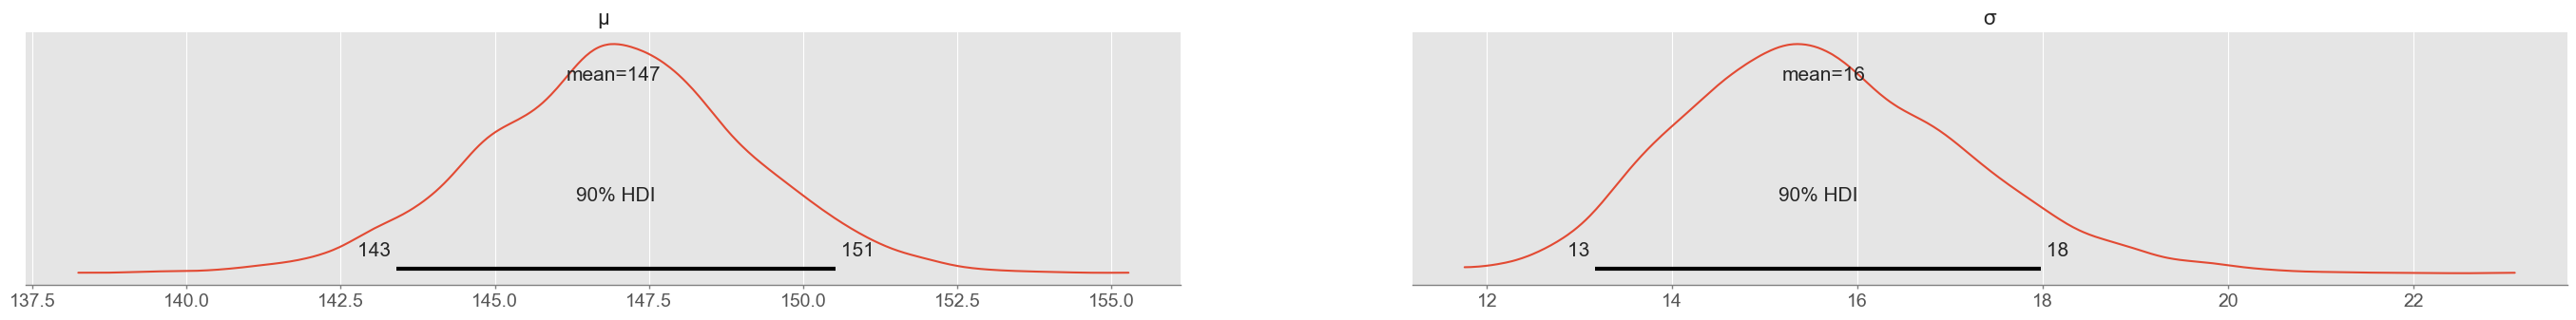

In [102]:
pm.plot_posterior( trace_normal, hdi_prob=0.9 )

In [103]:
pm.summary( trace_normal, hdi_prob=0.9 )

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,146.932,2.160,143.403,150.531,0.033,0.023,4198.0,2861.0,1.0
σ,15.633,1.517,13.163,17.979,0.024,0.017,3979.0,2610.0,1.0


With 90% plausibility, $\mu$ is between 143-150 and $\sigma$ is between 13 and 18 (values might change slightly after running the simulation with a different seed). After a full year of data, there is quite some (aleatoric) uncertainty remaining!

### b)

Use `pm.plot_pair()` (or an equivalent tool) to visualize the **joint posterior** of $(\mu,\sigma)$
in a contour plot.

- Does the joint posterior look approximately **multivariate normal**?
- Use `np.cov()` on the samples of $\mu$ and $\sigma$ to compute the **covariance matrix** of
  the posterior distribution.
- Are there strong **correlations** between $\mu$ and $\sigma$?

*Hint.* `np.cov()` expects an array where each column is one variable (here, $\mu$ and $\sigma$).

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

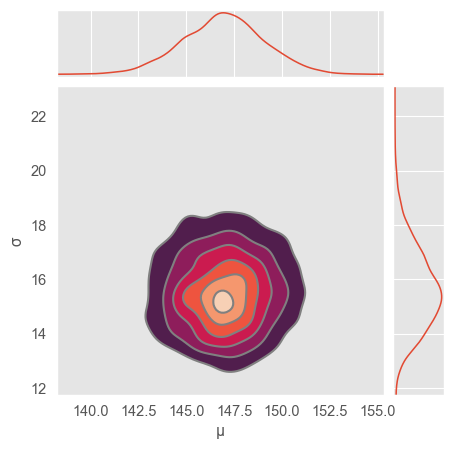

In [104]:
pm.plot_pair( trace_normal, kind="kde", figsize=(5,5), marginals=True )

Looks normally distributed! Note that variances are not equal and you should actually see an ellipse if you turn on equal aspect ratio.

In [105]:
data = np.hstack( [trace_normal.posterior.μ.values.flatten().reshape(-1,1), trace_normal.posterior.σ.values.flatten().reshape(-1,1)] )
C = np.cov( data.T )
C

array([[4.66346788, 0.03603082],
       [0.03603082, 2.30095004]])

Covariance matrix is almost diagonal! That means there are almost no correlations between $\mu$ and $\sigma$ also in the posterior!

Correlation matrix:

In [106]:
stdevs = np.sqrt(np.diag(C))
C / np.outer(stdevs, stdevs)

array([[1.        , 0.01099933],
       [0.01099933, 1.        ]])

### c)

Draw samples from the **posterior predictive distribution** using PyMC (e.g. with
`pm.sample_posterior_predictive()`) and use them to compute

- the **root mean squared error (RMSE)** and
- the **mean absolute error (MAE)**

averaged over both your data and your predictive distribution, as done in the lecture.

Report the values of RMSE and MAE for this model.

Compute predictions:

In [107]:
with tp_model_normal:
    ppc_normal = pm.sample_posterior_predictive(trace_normal)

Sampling: [y]


Reshape predictions for broadcasting with Numpy:

In [108]:
ypred_normal = ppc_normal.posterior_predictive.y.values.reshape(-1,53)
ypred_normal.shape

(4000, 53)

Compute differences:

In [109]:
eps_normal = ypred_normal - y_obs

RMSE (in kg):

In [110]:
np.sqrt( np.mean( eps_normal**2 ) )

21.991681174528424

MAE (in kg):

In [111]:
np.mean( np.abs( eps_normal ) )

16.764729791707023

RMSE and MAE are quite different, this could indicate the presence of outliers in the data..

### d)

You are not sure whether using the **normal distribution** as likelihood (sampling probability)
is appropriate.

Perform a **posterior predictive check** as in the lecture:

- Simulate many replicated data sets from the posterior predictive distribution,
- Compare typical replicated data to the **observed data**.

Are the observed data within the range of typical predictions by the model? If not:

- What tendencies do you observe (e.g. heavier tails, skewness, outliers)?
- What might be the reason for any discrepancies?

Discuss whether the normal likelihood is adequate here.

<Axes: xlabel='y'>

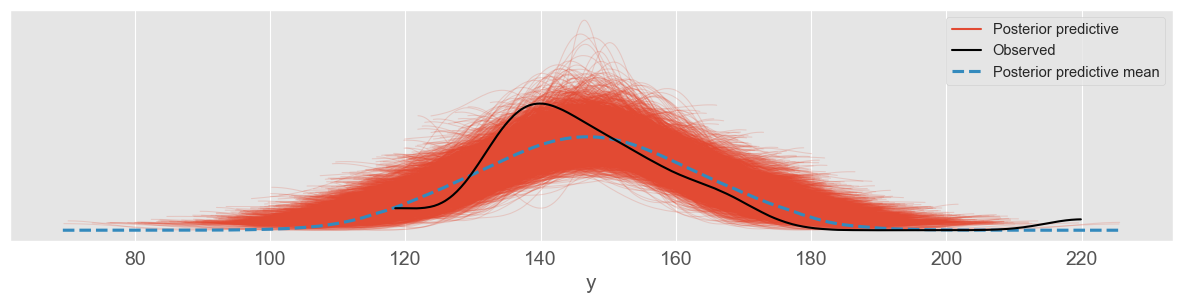

In [112]:
pm.plot_ppc( ppc_normal )

The predictions (red) closely follow a normal distribution. However, the center of the observed data distribution is more to the left! There is an outlier present that can be quickly found (using e.g. a strip plot from seaborn):

<Axes: >

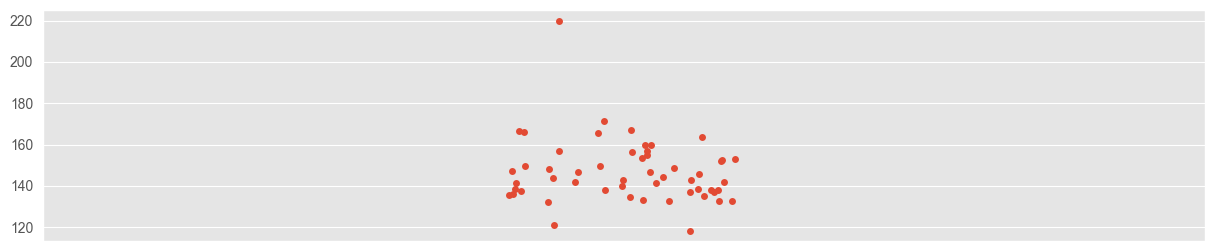

In [113]:
sns.stripplot( y_obs )

This outlier appears to pull the estimate for $\mu$ a bit towards the right. This has not much influence on the estimated mean, but quite some on the estimated standard deviation:

In [114]:
np.std( y_obs, ddof=1 ), np.std( y_obs[y_obs<200], ddof=1 )

(15.44934205108168, 11.683511702453055)

## Exercise 3

This exercise continues the analysis from Exercise 2.

After asking back, facility management tells you that there was a **large conference with many
external visitors** on one day, which caused a clear **outlier** in the toilet paper data.

You consider two options:

1. Remove the outlier and keep the normal model.
2. Keep all data and switch to a **robust likelihood** that can handle outliers.

Bayesians often prefer to keep the data intact and adapt the **model** instead of modifying
the data. Modifications of data are harder to document and reproduce than model changes.

You will therefore use the **Student's $t$ distribution** as a more robust likelihood.

### a)

Consider the **Student's $t$ distribution** with parameters $\mu$ (location), $\sigma$
(scale), and $\nu$ (degrees of freedom). In contrast to its classical use in $t$-tests, here
$\nu$ is just a shape parameter.

Use PreliZ to compare different Student's $t$ distributions with the normal distribution:

- Fix $\mu = 0$ and $\sigma = 1$,
- Consider $\nu \in \{2, 3, 5, 10, 20\}$,
- Plot the PDFs of $t(\mu, \sigma, \nu)$ and the standard normal $\mathcal{N}(0,1)$ on
  the same axes.

Questions:

- For which **limit of $\nu$** does the Student's $t$ distribution become equal to the
  normal distribution?
- How does the Student's $t$ distribution differ from the normal distribution, in
  particular regarding the **tails**?

*Hint.* Use `pz.StudentT(mu, sigma, nu).plot_pdf()` and
`pz.Normal(mu, sigma).plot_pdf()`. Choose an appropriate figure size
(e.g. `figsize=(8,6)`) and $x$-limits (e.g. `plt.xlim(-4,4)`).

(-4.0, 4.0)

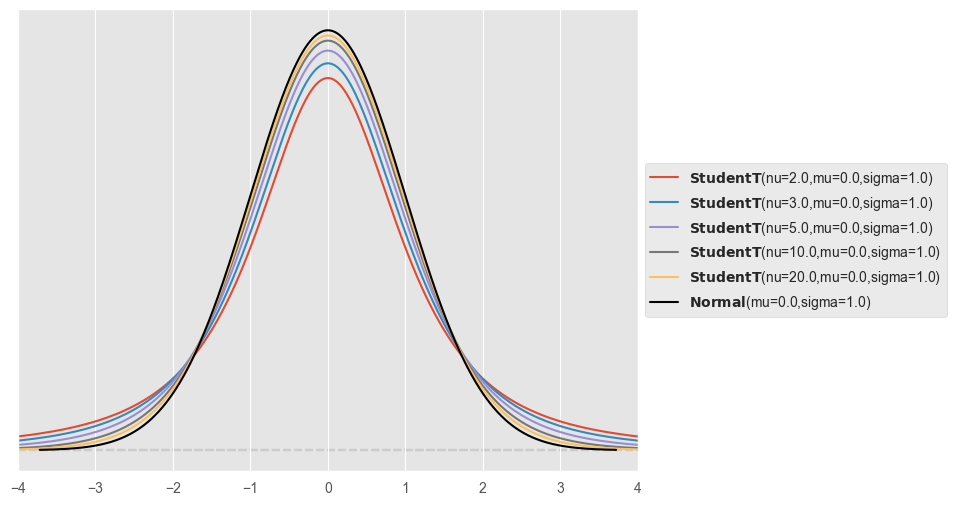

In [115]:
plt.figure( figsize=(8,6) )
for nu in [2,3,5,10,20]:
    pz.StudentT( mu=0, sigma=1, nu=nu ).plot_pdf()
pz.Normal( mu=0, sigma=1 ).plot_pdf( color="black" )
plt.xlim([-4,4])

The Student's $t$ distribution converges towards the normal distribution for large values of $\nu$ (so in theory for $\nu \to \infty$). For smaller values of $\nu$, the Student's $t$ distribution has fatter tails than the normal distribution.

### b)

Repeat your modelling from Exercise 2, but now use a **Student's $t$ likelihood** instead
of a normal likelihood for the toilet paper data.

Use a $\operatorname{Gamma}(s=10, r=1.1)$ prior distribution for $\nu$ (visualize it beforehand
to understand which values of $\nu$ are a priori plausible).

From the posterior samples, compute the **$90\%$ HDIs** for $\mu$, $\sigma$, and $\nu$.

Based on the posterior of $\nu$:

- Do you expect the resulting Student's $t$ likelihood to have significantly **fatter tails**
  than the normal likelihood used previously?

Prior for $\nu$:

<Axes: >

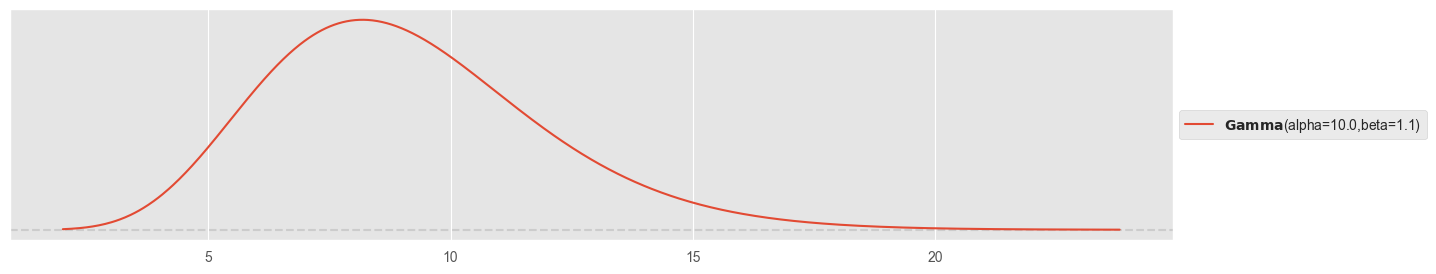

In [116]:
pz.Gamma(10,1.1).plot_pdf()

Simulation:

In [117]:
with pm.Model() as tp_model_studentt:
    μ = pm.Normal( 'μ', mu=ybar, sigma=sigmahat )
    σ = pm.Exponential( 'σ', lam=1/sigmahat )
    ν = pm.Gamma( 'ν', alpha=10, beta=1.1 )
    y = pm.StudentT( 'y', mu=μ, sigma=σ, nu=ν, observed=y_obs )
    trace_studentt = pm.sample( 1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, ν]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>,
       <Axes: title={'center': 'ν'}>], dtype=object)

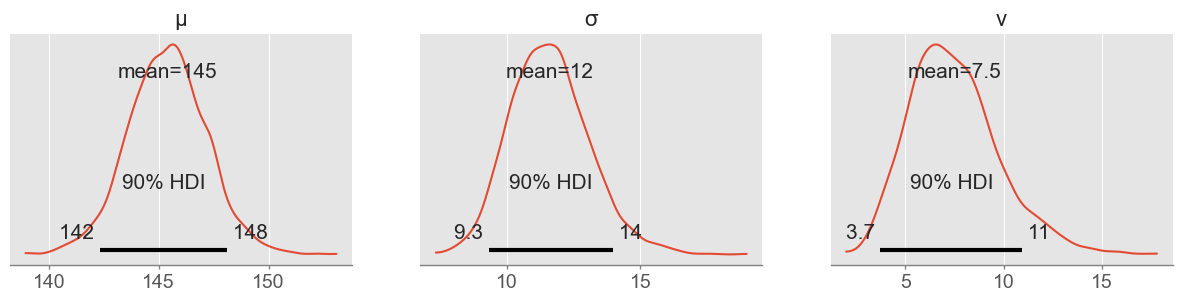

In [118]:
pm.plot_posterior( trace_studentt, figsize=(15,3), hdi_prob=0.9 )

There is slightly less uncertainty in the mean $\mu$ and considerable less uncertainty in $\sigma$ (that was by definition heavily influenced by the outlier)! $\nu$ is with 90% plausibility between 4 and 11, a considerable difference to a normal distribution with fatter tails:

(-4.0, 4.0)

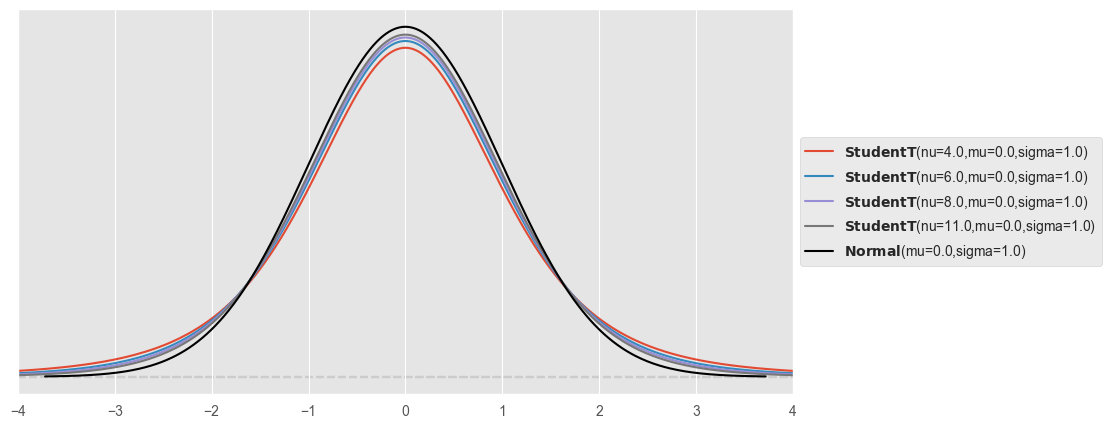

In [119]:
plt.figure( figsize=(10,5) )
for nu in [4,6,8,11]:
    pz.StudentT( mu=0, sigma=1, nu=nu ).plot_pdf()
pz.Normal( mu=0, sigma=1 ).plot_pdf( color="black" )
plt.xlim([-4,4])

The fatter tails allow to accomodate the outlier there, while the normal distribution tries to bring the outlier more within its center.

### c)

Repeat the **posterior predictive check** from Exercise 2 using the new model with the
Student's $t$ likelihood.

- Compare how well the **normal-likelihood model** and the **Student's $t$-likelihood model**
  capture the observed data.
- In particular, examine how they deal with the **outlier**.

How do the posterior predictive distributions differ between the two models?

In [120]:
with tp_model_studentt:
    ppc_studentt = pm.sample_posterior_predictive(trace_studentt)

Sampling: [y]


Text(0.5, 1.0, "Student's t likelihood")

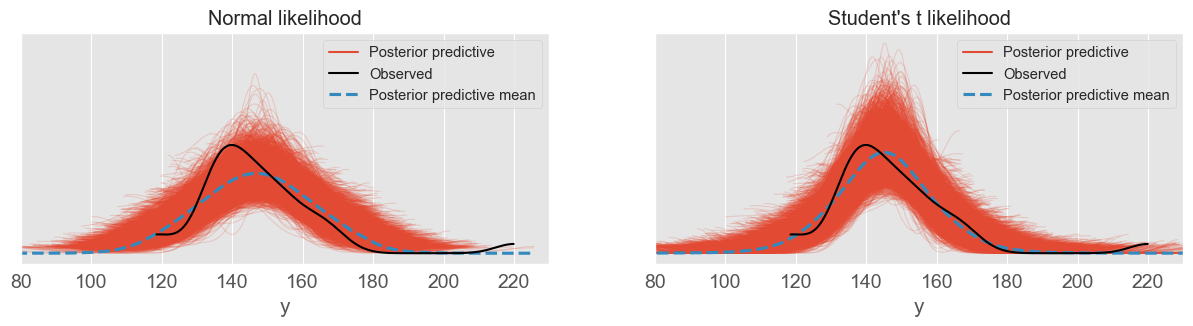

In [121]:
fig, ax = plt.subplots(1, 2, sharey=True )
plt.sca( ax[0] )
pm.plot_ppc( ppc_normal, ax=ax[0] )
plt.xlim(80, 230)
plt.title("Normal likelihood")
plt.sca( ax[1] )
pm.plot_ppc( ppc_studentt, ax=ax[1] )
plt.xlim(80, 230)
plt.title("Student's t likelihood")

Student's $t$ likelihood seems to make predictions quite a bit closer to the data distribution!

### d)

Compute again the **RMSE** and **MAE** for the Student's $t$ model, as in Exercise 2.

Compare the values to those obtained under the normal-likelihood model:

- Are RMSE and MAE smaller or larger under the Student's $t$ model?
- What did you expect and why?

Discuss possible reasons why RMSE and MAE might not be as much smaller as you would wish,
even if the Student's $t$ model handles outliers better.

In [122]:
ypred_studentt = ppc_studentt.posterior_predictive.y.values.reshape(-1,53)
eps_studentt = ypred_studentt - y_obs

RMSE:

In [123]:
np.sqrt( np.mean( eps_studentt**2 ) )

20.87192350109563

MAE:

In [124]:
np.mean( np.abs( eps_studentt ) )

15.394173035333631

RMSE and MAE are now of almost equal size. However they are only a bit smaller. Choosing a more complex distribution (3 instead of 2 parameters) comes with more uncertainty in the parameters and consequently more predictive uncertainty for the same amount of data. Even though we have reduced the bias of the model ('wrong' normal likelihood assumption), we have now increased its variance by introducing an additional parameter.

### e)

Compare the normal-likelihood model and the Student's $t$-likelihood model in terms of
**expected log predictive density (ELPD)** (e.g. using PSIS-LOO as implemented in ArviZ).

- Can you clearly favour one model over the other based on ELPD and its uncertainty?
- How does this comparison relate to your posterior predictive checks and the RMSE/MAE
  results?

Summarize which model you would recommend and why.

In [125]:
with tp_model_normal:
    pm.compute_log_likelihood(trace_normal)
loo_normal = pm.loo( trace_normal )

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


(this warning is justified!!)

In [126]:
with tp_model_studentt:
    pm.compute_log_likelihood(trace_studentt)
loo_studentt = pm.loo( trace_studentt )

In [127]:
df_comp_loo = pm.compare({'Normal Likelihood': loo_normal, 'Student\'s t Likelihood': loo_studentt})
df_comp_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Student's t Likelihood,0,-216.108792,2.743624,0.000000,1.0,8.996593,0.000000,False,log
Normal Likelihood,1,-224.188942,5.592150,8.080149,0.0,13.996526,6.142415,True,log


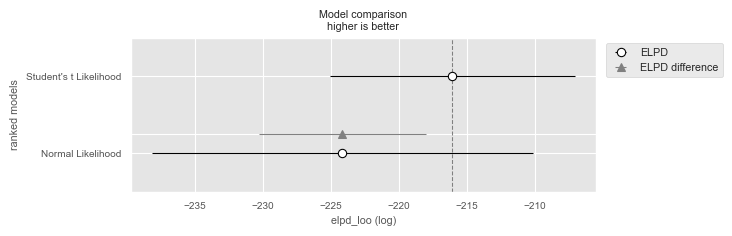

In [128]:
pm.plot_compare(df_comp_loo);

In terms of ELPD, the model with the Student's $t$ likelihood is not significantly better (by the one-standard-error rule) than the model with the normal likelihood. This would probably change with more data and is due to the additional uncertainties (e.g. in the estimation of $\nu$).

## Exercise 4

SBB wants to plan resources (personnel and spare parts) for **railway switch maintenance**.
To this end, they have collected, for 10 years, the **weekly counts of defective railway switches**
(fictitious data, stored in `railway_switch_data.npy`).

You want to assess whether a **Poisson** or a **negative binomial** likelihood is more appropriate
for modelling these counts. Because models with more parameters typically come with additional
uncertainty, you proceed carefully.

Data:

In [129]:
y_obs = np.load( "data/railway_switch_data.npy" )

### a) 

Run posterior simulations for two competing models:

1. **Poisson model**  
   Likelihood:
   $$
   y \sim \operatorname{Pois}(\lambda),
   $$
   prior:
   $$
   \lambda \sim \mathcal{N}(\bar{y}, \hat{\sigma}),
   $$
   where $\bar{y}$ is the empirical data mean and $\hat{\sigma}$ the empirical standard
   deviation.

2. **Negative binomial model**  
   Likelihood:
   $$
   y \sim \operatorname{NegBin}(r, \lambda),
   $$
   with the same prior on $\lambda$ as above and a $\operatorname{Gamma}(2, 0.1)$ prior on
   the dispersion parameter $r$.

Tasks:

- Visualize the **priors** for $\lambda$ and $r$ before running the simulation. Do they
  make sense to you for this context?
- After running both models, visualize the **marginal posterior distributions** of all
  parameters and assess their uncertainty.

*Hint.* PyMC uses its own parameter names for distributions; make sure you map the
parameterizations correctly.

#### Poisson likelihood model:

<Axes: >

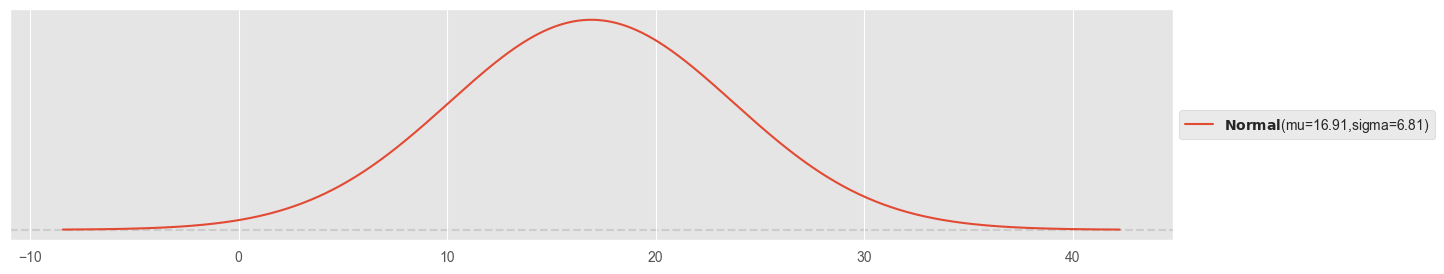

In [130]:
pz.Normal( mu=np.mean(y_obs), sigma=np.std(y_obs) ).plot_pdf()

In [131]:
with pm.Model() as poisson_model:
    lbd = pm.Normal( 'lbd', mu=np.mean(y_obs), sigma=np.std(y_obs) )
    y = pm.Poisson( 'y', mu=lbd, observed=y_obs )
    trace_poisson = pm.sample( 1000, chains=4 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


<Axes: title={'center': 'lbd'}>

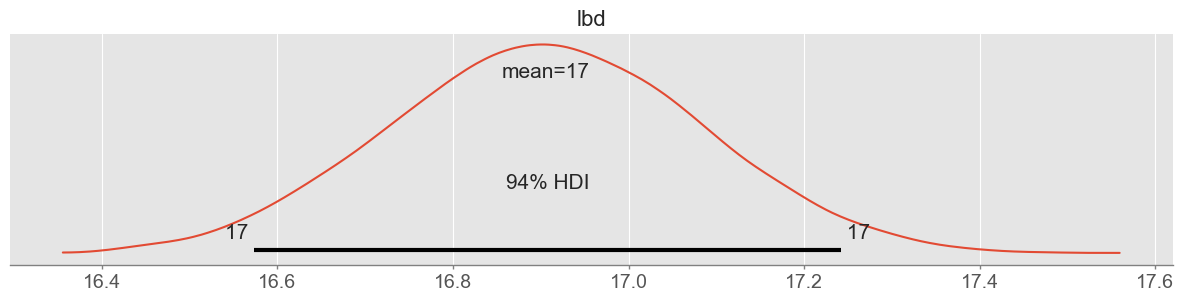

In [132]:
pm.plot_posterior( trace_poisson )

#### Negative binomial likelihood model:

<Axes: >

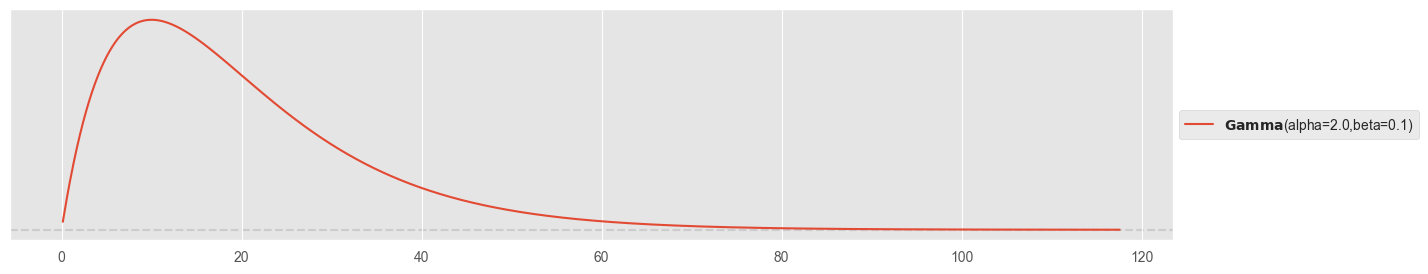

In [133]:
pz.Gamma( alpha=2, beta=0.1 ).plot_pdf()

In [134]:
with pm.Model() as negbin_model:
    lbd = pm.Normal( 'lbd', mu=np.mean(y_obs), sigma=np.std(y_obs) )
    r = pm.Gamma( 'alpha', alpha=2, beta=0.1 )
    y = pm.NegativeBinomial( 'y', mu=lbd, alpha=r, observed=y_obs )
    trace_negbin = pm.sample( 1000, chains=4 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([<Axes: title={'center': 'lbd'}>, <Axes: title={'center': 'alpha'}>],
      dtype=object)

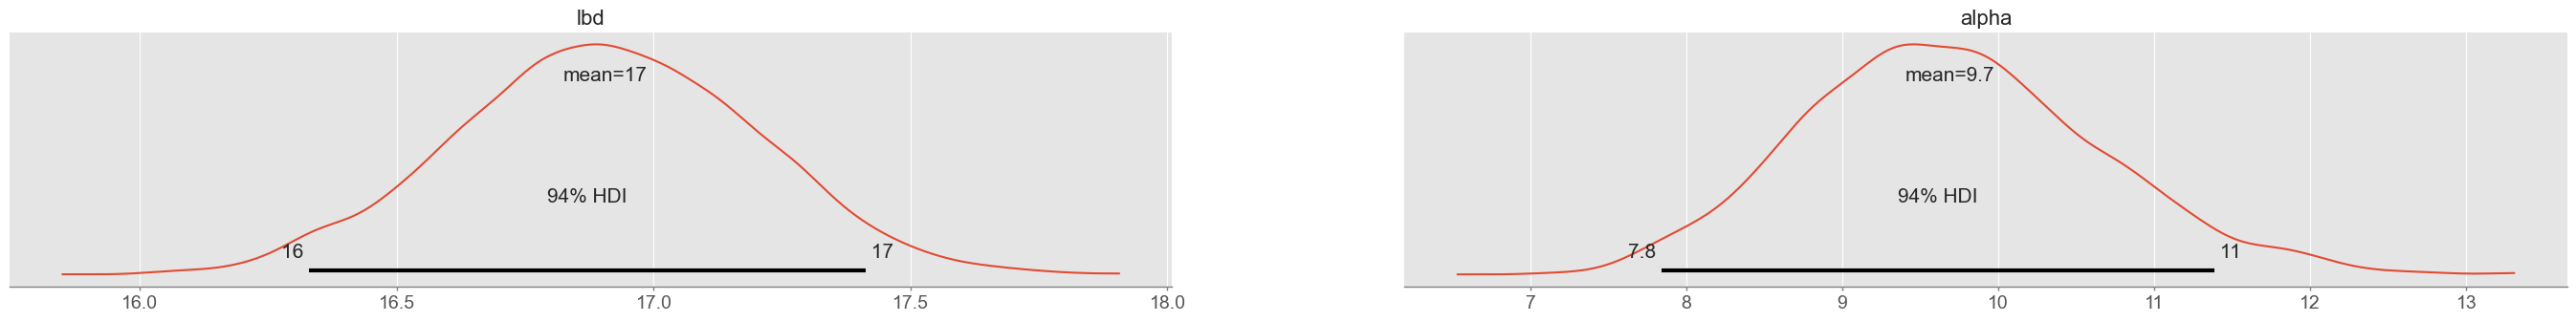

In [135]:
pm.plot_posterior( trace_negbin )

<Axes: xlabel='lbd', ylabel='alpha'>

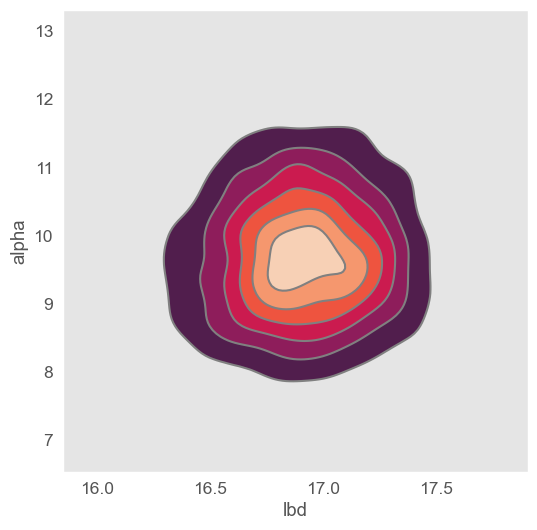

In [136]:
pm.plot_pair( trace_negbin, kind="kde", figsize=(6,6) )

Again the joint posterior distribution looks normally distributed!

### b)

Perform **posterior predictive checks** for both models:

- Generate replicated data sets from the posterior predictive distributions of the Poisson
  and negative binomial models.
- Plot the predictive distributions side by side with the observed data.

Which model do you prefer after these posterior predictive checks, and why?

Posterior predictions:

In [137]:
with poisson_model:
    ppc_poisson = pm.sample_posterior_predictive(trace_poisson)

with negbin_model:
    ppc_negbin = pm.sample_posterior_predictive(trace_negbin)

Sampling: [y]


Sampling: [y]


Posterior predictive checks:

Text(0.5, 1.0, 'Negative binomial likelihood')

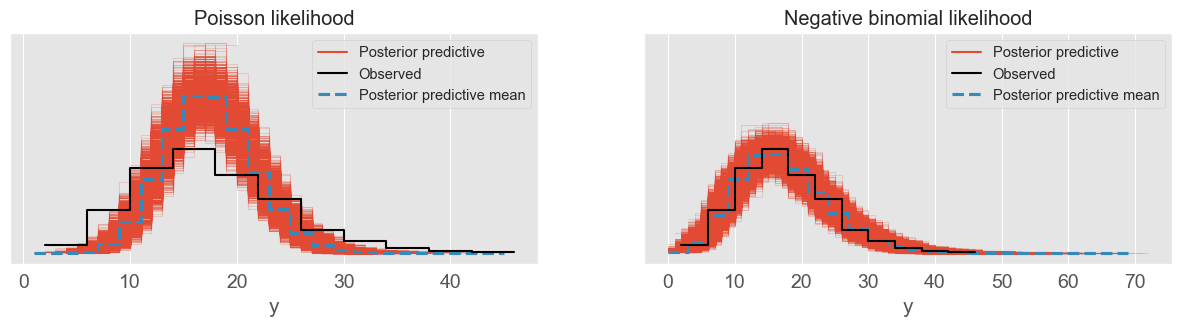

In [138]:
fig, ax = plt.subplots(1, 2, sharey=True )
plt.sca( ax[0] )
pm.plot_ppc( ppc_poisson, ax=ax[0] )
plt.title("Poisson likelihood")
plt.sca( ax[1] )
pm.plot_ppc( ppc_negbin, ax=ax[1] )
plt.title("Negative binomial likelihood")

The negative binomial likelihood seems much better suited to model the data!

### c)

Compute the **Bayes factor** between the marginal likelihoods of the two models:

- Poisson model: $M_{\text{Pois}}$,
- Negative binomial model: $M_{\text{NegBin}}$.

Use Sequential Monte Carlo (SMC), as introduced in the lecture and companion notebook, to
obtain estimates of the marginal likelihoods
$$
p(d \mid M_{\text{Pois}})
\quad \text{and} \quad
p(d \mid M_{\text{NegBin}}).
$$

From these, compute the Bayes factor
$$
\operatorname{BF}
= \frac{p(d \mid M_{\text{NegBin}})}{p(d \mid M_{\text{Pois}})}.
$$

Questions:

- Which model explains the data better according to the Bayes factor?
- Are you surprised by how **small** the marginal likelihood values are numerically?

In [139]:
with pm.Model() as poisson_model_smc:
    lbd = pm.Normal( 'lbd', mu=np.mean(y_obs), sigma=np.std(y_obs) )
    y = pm.Poisson( 'y', mu=lbd, observed=y_obs )
    trace_poisson_smc = pm.sample_smc( 2000, chains=4 )

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [140]:
with pm.Model() as negbin_model_smc:
    lbd = pm.Normal( 'lbd', mu=np.mean(y_obs), sigma=np.std(y_obs) )
    r = pm.Gamma( 'alpha', alpha=2, beta=0.1 )
    y = pm.NegativeBinomial( 'y', mu=lbd, alpha=r, observed=y_obs )
    trace_negbin_smc = pm.sample_smc( 1000, chains=4 )

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [141]:
lpd1 = trace_poisson_smc.sample_stats.log_marginal_likelihood.mean().values
lpd2 = trace_negbin_smc.sample_stats.log_marginal_likelihood.mean().values
BF = np.exp( lpd2 - lpd1 )
lpd1, lpd2, BF

(array(-1946.58968604), array(-1757.06373692), 2.042085297871379e+82)

It is beyond any discussion that the negative binomial model is better suited (BF=$10^{82}$..)

The marginal probabilities are extremely small!

In [142]:
np.exp(lpd1)

0.0

In [143]:
np.exp(lpd2)

0.0

This is the reason why we work with log probabilities, to at least being able to evaluate the Bayes factor. The marginal probabilities are so small because they are the product of the probabilities of all data points under the posterior distribution:

$$
p(d|\mathcal{M}_i) = \prod_{k=1}^N p(y_k|\mathcal{M}_i)
$$

Imagine each data point has on average 80% probability under the model (which is high). Then the resulting marginal probability is

In [144]:
0.8**len(y_obs)

4.342032859091343e-52

extremely small values are to be expected!

### d)

Compare the two models in terms of **ELPD** (e.g. using PSIS-LOO or WAIC).

- Is there a clear winner when you apply the **one-standard-error rule** to the ELPD
  estimates?
- How does this comparison relate to the Bayes factor and posterior predictive checks?

In [145]:
with poisson_model:
    pm.compute_log_likelihood(trace_poisson)
loo_poisson = pm.loo( trace_poisson )

In [146]:
with negbin_model:
    pm.compute_log_likelihood(trace_negbin)
loo_negbin = pm.loo( trace_negbin )

In [147]:
df_comp_loo = pm.compare({'Poisson Likelihood': loo_poisson, 'Negative Binomial Likelihood': loo_negbin})
df_comp_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Negative Binomial Likelihood,0,-1753.489215,1.999091,0.000000,0.996716,16.779695,0.000000,False,log
Poisson Likelihood,1,-1944.844939,2.751344,191.355723,0.003284,44.248983,28.162401,False,log


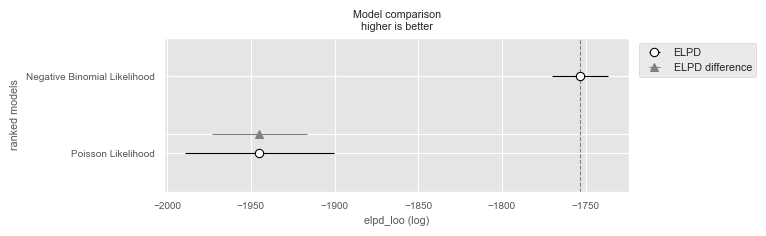

In [148]:
pm.plot_compare(df_comp_loo);

Clearly it is recommended to use the negative binomial model! This time we have enough data to reduce the uncertainty of the additional parameter.

### e)

Compute the **predictive RMSE** and **predictive MAE** for both models using their respective
posterior predictive distributions.

- Which model performs better in terms of these error metrics?
- Are the conclusions consistent with the other comparison methods (Bayes factor, ELPD,
  posterior predictive checks)?

In [149]:
ypred_poisson = ppc_poisson.posterior_predictive.y.values.reshape(-1,530)
ypred_negbin = ppc_negbin.posterior_predictive.y.values.reshape(-1,530)
eps_poisson = ypred_negbin - y_obs
eps_negbin = ypred_poisson - y_obs

RMSE:

In [150]:
rmse_poisson = np.sqrt( np.mean( eps_poisson**2 ) )
rmse_negbin = np.sqrt( np.mean( eps_negbin**2 ) )
rmse_poisson, rmse_negbin

(9.655246813921218, 7.962056746941046)

MAE:

In [151]:
mae_poisson = np.mean( np.abs( eps_poisson ) )
mae_negbin = np.mean( np.abs( eps_negbin ) )
mae_poisson, mae_negbin

(7.594483490566038, 6.2942891509433965)

Both negative binomial RMSE and MAE are a bit smaller!

## Exercise 5

You work at a national health insurance company. Recently, more customers than usual have
terminated their insurance policies. The **number of customers terminating their contract** is
called ***churn***.

The sales department investigates the reasons for churn:

- They tried to contact **200** customers who had left.
- They successfully reached **150** of them.
- Out of these 150, **112** gave a clear answer.
- These 112 answers are grouped into three main categories:
  1. premium too high ($k_1 = 82$ cases)
  2. insufficient coverage ($k_2 = 24$ cases)
  3. unsuitable insurance models ($k_3 = 6$ cases)

You are aware that this is a **restricted sample**, and you decide to use a **Bayesian multinomial
model** with a flat Dirichlet prior to model the true underlying proportions $\pi_1, \pi_2, \pi_3$
in the whole customer population.

### a)

Use a **multinomial likelihood** with parameters
$$
\boldsymbol{\pi} = (\pi_1, \pi_2, \pi_3),
$$
and a **flat Dirichlet prior**, e.g.
$$
\boldsymbol{\pi} \sim \operatorname{Dirichlet}(1,1,1).
$$

Simulate the posterior with PyMC and visualize the **marginal posterior distributions** of
$\pi_1$, $\pi_2$ and $\pi_3$.

What **$90\%$ HDIs** can you communicate to management for each of the three proportions?
Formulate your answer in a short sentence in plain language.

In [152]:
observed_counts = [82, 24, 6]

rng = np.random.default_rng(123)

with pm.Model() as churn_model:
    pi = pm.Dirichlet( 'pi', a=[1,1,1] )
    y = pm.Multinomial( 'y', n=np.sum(observed_counts), p=pi, observed=observed_counts )
    trace = pm.sample(1000, random_seed=rng)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


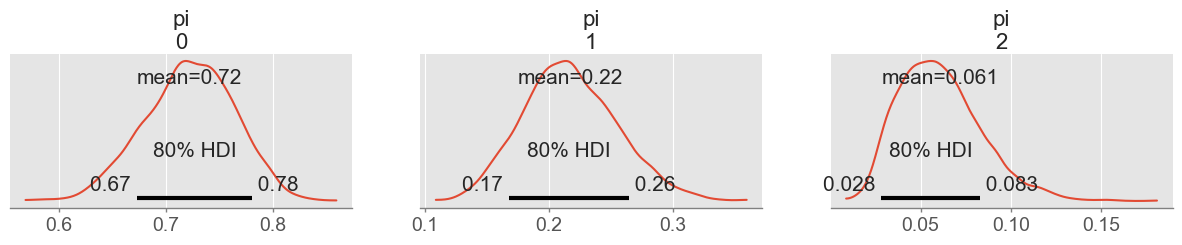

In [153]:
pm.plot_posterior( trace, figsize=(15,2), hdi_prob=0.8 );

I believe to 90% that for around 67-78% of the churn customers the premium is too high, for around 17-27% the coverage was unsufficient and around 0.03-0.09% found our insurance models unsuitable.

### b)

Use Dirichlet–multinomial conjugacy and PreliZ to visualize the posterior on the **probability
simplex**:

- Plot the Dirichlet posterior density on the 2D simplex.
- Optionally, also plot the marginals for $\pi_1$, $\pi_2$, $\pi_3$.

Comment briefly on the shape of the posterior (e.g. how concentrated it is, which category
dominates, etc.).

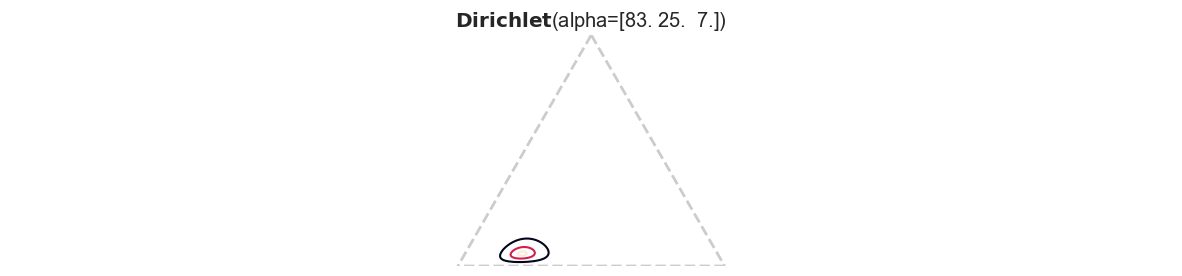

In [154]:
alpha = np.array([1,1,1])
pz.Dirichlet( alpha + observed_counts ).plot_pdf( marginals=False )

### c)

Your superior is sceptical and says:

> "It is very typical that people switch contracts because of the premium.
> I would have used a $\operatorname{Dirichlet}(10,1,1)$ prior that reflects this."

Tasks:

1. Use PreliZ to visualize this alternative prior on the simplex and its marginal for $\pi_1$.
2. Compute the prior mean and standard deviation for $\pi_1$ under the
   $\operatorname{Dirichlet}(10,1,1)$ prior.
3. Re-run your Bayesian analysis with this alternative prior and compare the **posterior** to
   the one obtained with the flat prior.

Show that the posterior results are quite similar and that the posterior is fairly **insensitive**
to this prior choice, given the data size.

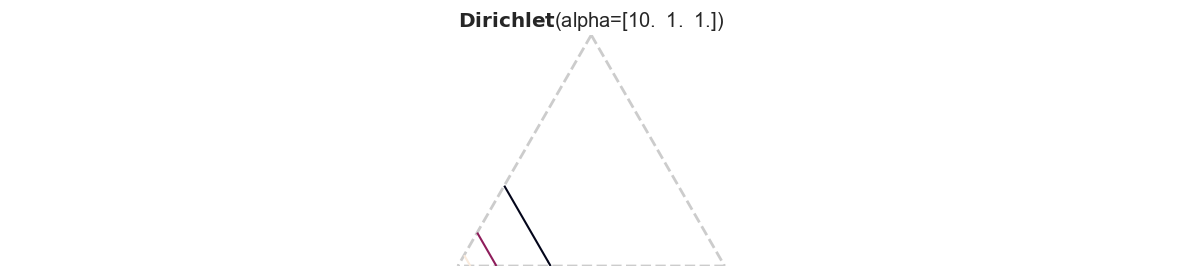

In [155]:
pz.Dirichlet( [10,1,1] ).plot_pdf( marginals=False )

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: divide by zero encountered in nb_logpdf
  return super().__call__(*args, **kws)


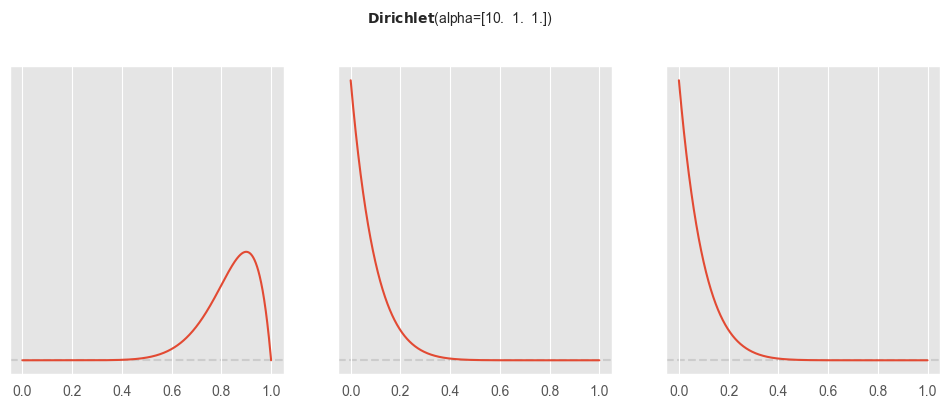

In [156]:
pz.Dirichlet( [10,1,1] ).plot_pdf()

In [157]:
pz.Dirichlet( [10,1,1] ).summary()

Dirichlet(mean=array([0.83333333, 0.08333333, 0.08333333]), std=array([0.10336228, 0.07665552, 0.07665552]))

In [158]:
with pm.Model() as churn_model:
    pi = pm.Dirichlet( 'pi', a=[10,1,1] )
    y = pm.Multinomial( 'y', n=np.sum(observed_counts), p=pi, observed=observed_counts )
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


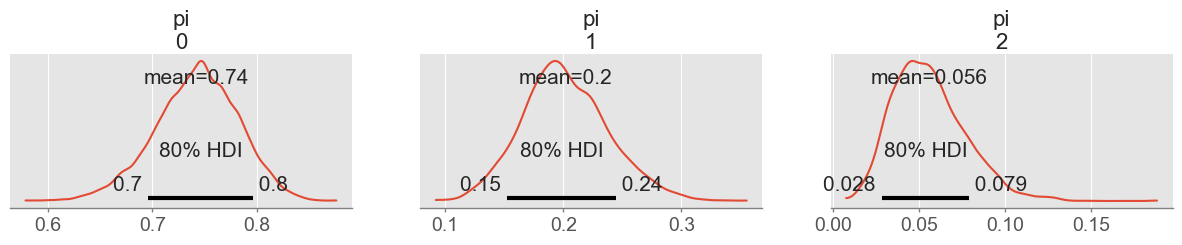

In [159]:
pm.plot_posterior( trace, figsize=(15,2), hdi_prob=0.8 );

90% HDIs are only changed by a few percent! This will not have a big impact on my communication.

## Exercise 6

The **multivariate normal distribution** plays an important role in Bayesian inference.
It is not heavily used in the first part of this lecture because high-level libraries (like
bambi or PyMC) hide much of the complexity, but it will become essential later, e.g. for
Gaussian process models.

The following sub-exercises are designed to help you get more familiar with the multivariate
normal distribution.

### a) 

Load the **credit rating** data from `credit_data.csv` and select

- `Income` as $x$,
- `Rating` as $y$.

Compute classical estimators for the mean vector
$$
\boldsymbol{\mu} =
\begin{pmatrix}
\mu_x \\ \mu_y
\end{pmatrix}
$$
and the covariance matrix $\Sigma$.

Visualize the resulting bivariate normal distribution $\mathcal{N}(\hat{\boldsymbol{\mu}}, \hat{\Sigma})$
using a contour plot and overlay the original data points.

Discuss qualitatively whether the normal distribution appears to be a **reasonable model** for
this data.

*Hints.*

- Use `np.cov()` to compute the empirical covariance matrix.
- You may reuse code from the notebook `week5_multivariate_distributions.ipynb` to produce the
  contour plot.

Load data:

In [160]:
credit_data = pd.read_csv("data/credit_data.csv")
credit_data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Compute means and covariance:

In [161]:
mu = credit_data[["Income", "Rating"]].mean().values
mu

array([ 45.218885, 354.94    ])

In [162]:
cov = np.cov( credit_data[["Income", "Rating"]].values.T, ddof=1 )
cov

array([[ 1242.15879093,  4315.49294045],
       [ 4315.49294045, 23939.56030075]])

Plot contour and data (removed equal axis dimensions to make the plot a bit more appealing):

In [163]:
# from notebook "week5_multivariate_distributions.ipynb"
def plot_mvnormal( mu, cov, xrange=[-3,3], yrange=[-3,3], ax=None ):
    
    # setup grid
    x = np.linspace(xrange[0], xrange[1], 1000)
    y = np.linspace(yrange[0], yrange[1], 1000)
    X, Y = np.meshgrid(x, y)

    # multivariate normal
    Z = stats.multivariate_normal( mean=mu, cov=cov ).pdf( np.dstack((X, Y)) )

    # create plot
    if ax is not None:
        plt.sca(ax)

    CS = plt.contour(X, Y, Z, levels=20)
    #plt.gca().set_aspect("equal");

<Axes: xlabel='Income', ylabel='Rating'>

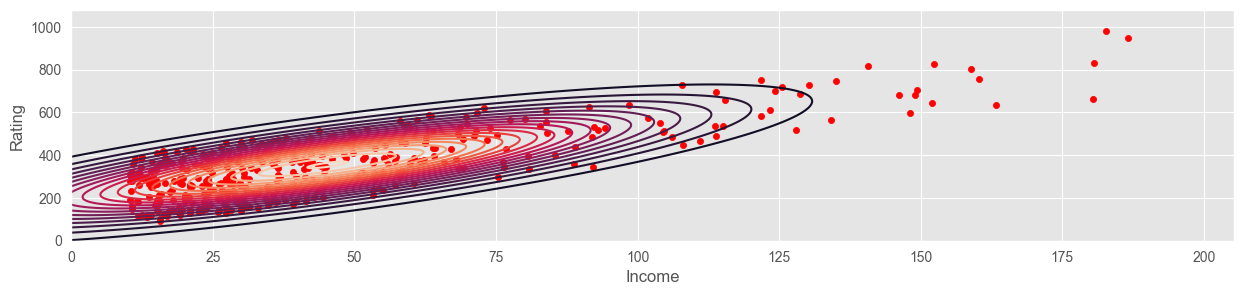

In [164]:
xmin = 0
xmax = credit_data.Income.max() * 1.1
ymin = 0
ymax = credit_data.Rating.max() * 1.1
plot_mvnormal( mu, cov, xrange=[xmin, xmax], yrange=[ymin, ymax] )
credit_data.plot.scatter(x="Income", y="Rating", c="red", ax=plt.gca())

### b)

Show that if $x_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ and
$x_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$ are **independent**, then
$$
x_1 + x_2 \sim \mathcal{N}(\mu_1 + \mu_2,\; \sigma_1^2 + \sigma_2^2).
$$

*Hints.*

- Compute $\mathbb{E}[x_1 + x_2]$ and use linearity of expectation.
- Compute $\operatorname{Var}(x_1 + x_2)$ and use that, for independent $x_1$ and $x_2$,
  $$
  \operatorname{Var}(x_1 + x_2)
  = \operatorname{Var}(x_1) + \operatorname{Var}(x_2).
  $$

$$
E[x_1 + x_2] = E[x_1 ]+ E[x_2] = \mu_1 + \mu_2
$$

$$
\text{Var}[x_1 + x_2] = \text{Var}[x_1]+ \text{Var}[x_2] = \sigma_1^2 + \sigma_2^2
$$

$$
\Longrightarrow x_1 + x_2 \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)
$$

### c)

Let $\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)$ be a random vector and let
$A$ be a matrix and $b$ a vector of compatible dimensions. Show that the **affine
transformation**
$$
\mathbf{Y} = A\mathbf{X} + b
$$
is also multivariate normal:
$$
\mathbf{Y} \sim \mathcal{N}(A\boldsymbol{\mu} + b,\; A\Sigma A^{\top}).
$$

*Hints.*

- Compute $\mathbb{E}[\mathbf{Y}]$ and use linearity of expectation.
- Use that, for a random vector $\mathbf{X}$ with covariance matrix $\Sigma$,
  $$
  \Sigma
  = \operatorname{Cov}(\mathbf{X})
  = \mathbb{E}\big[(\mathbf{X} - \mathbb{E}[\mathbf{X}])
                  (\mathbf{X} - \mathbb{E}[\mathbf{X}])^{\top}\big]
  = \mathbb{E}[\mathbf{X}\mathbf{X}^{\top}] - \mathbb{E}[\mathbf{X}]\, \mathbb{E}[\mathbf{X}]^{\top}.
  $$

$$
E[A\,X + \mathbf{b}] = A \boldsymbol{\mu} + \mathbf{b}
$$

$$
\begin{eqnarray}
\text{Cov}[A\,X + \mathbf{b}] &=& \text{Cov}[A\,X]\\
                              &=& E[(A\,X)\,(A\,X)^T] - E[A\,X] \, E[A\,X]^T\\
                              &=& E[A\,X\,X^T\,A^T - A\,E[X]\,E[X]^T\,A^T ]\\
                              &=& A \, E[X\,X^T]\, A^T - A \, E[X] \, E[X]^T \, A^T\\
                              &=& A \, \left( E[X\,X^T] - E[X] \, E[X]^T \right) \, A^T\\
                              &=& A \, \Sigma \, A^T
\end{eqnarray}
$$